In [1]:
import pandas as pd
import numpy as np

In [2]:
# dataset_dir = r"C:\Users\IdeaPad\Documents\ML\American-Sign-Language-Recognition-master\American-Sign-Language-Recognition-master\DATASET"
df_train=pd.read_csv("bisindo_dataset_train_2data.csv")
df_test=pd.read_csv("bisindo_dataset_test_2data.csv")
y_train=df_train['label'].values
y_test=df_test['label'].values
df_train.drop('label',axis=1,inplace=True)
df_test.drop('label',axis=1,inplace=True)
df_test.head()
df_train.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,165,179,177,179,182,185,186,184,178,191,...,144,139,135,132,130,117,126,125,124,123
1,217,219,220,221,221,223,224,223,224,224,...,188,187,181,104,98,107,108,106,168,182
2,159,160,161,162,163,164,165,166,167,168,...,155,155,155,158,109,82,98,110,123,152
3,128,129,130,132,133,134,135,136,137,138,...,124,124,125,129,80,52,66,78,91,121
4,158,171,169,172,179,181,181,182,178,193,...,140,135,131,129,127,114,123,122,121,124


In [3]:
x_train=df_train.values
x_test=df_test.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [4]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [5]:
print(x_train.shape)
print(x_test.shape)

(12832, 28, 28, 1)
(3000, 28, 28, 1)


In [6]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [7]:
print(y_train)
print(y_test)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


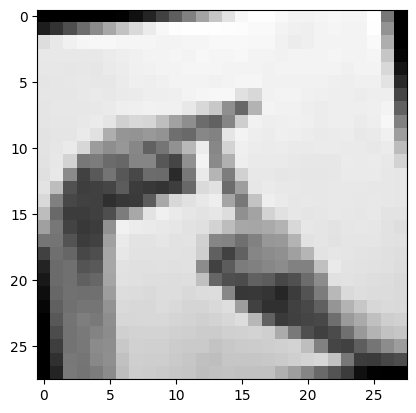

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[9000].reshape(28,28),cmap='gray')

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [11]:
batch_size = 256
num_classes = 27
epochs = 100


In [12]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

C:\Users\IdeaPad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


In [14]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.0389 - loss: 3.2881 - val_accuracy: 0.0720 - val_loss: 3.2659
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.0567 - loss: 3.2494 - val_accuracy: 0.1677 - val_loss: 3.0025
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.1729 - loss: 2.9420 - val_accuracy: 0.4380 - val_loss: 2.3579
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.3323 - loss: 2.4156 - val_accuracy: 0.5700 - val_loss: 1.8863
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.4485 - loss: 2.0308 - val_accuracy: 0.5580 - val_loss: 1.7045
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5011 - loss: 1.8190 - val_accuracy: 0.6300 - val_loss: 1.5478
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.5302 - loss: 1.7040 - val_accuracy: 0.6530 - val_loss: 1.4662
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.5572 - loss: 1.5801 - val_accuracy: 0.

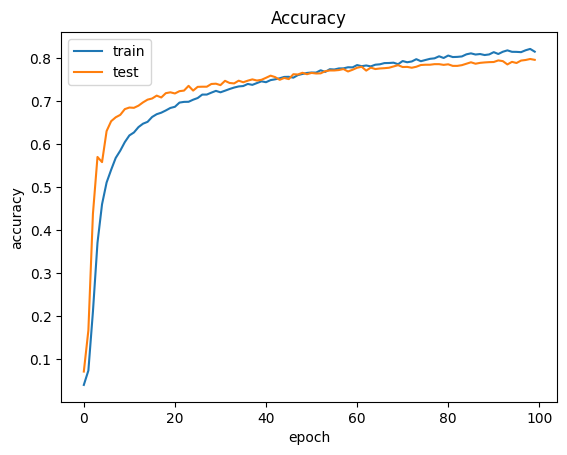

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [16]:
model.save('sign_language.keras')

In [17]:
import cv2
from keras.preprocessing.image import img_to_array
alphabet=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y', 'Z', '-']
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    proba=model.predict(image)
    idx = np.argmax(proba)
    return alphabet[idx]

In [18]:
classify(x_train[12820]*255)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


'Z'

In [19]:
print(y_train[12820])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
